## [Gould90](https://aip.scitation.org/doi/pdf/10.1063/1.4822960)
Diffusion Quantum Monte Carlo. P. J. Reynolds, J. Tobochnik, and H. Gould. *Comput. Phys.* **1990**, *4*, 662.

"Suggestions for Further Study" Project 1 - *naive* diffusion quantum Monte-Carlo method for the one-dimensional harmonic oscillator 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# diffusion constant, atomic unit
D = 1/2
# time step
dt = 0.01

## Hold $E_0$ as the ground truth value

In [3]:
# initialization of 20000 positions as configurations (M=20000)
positions = np.random.rand(20000) - 0.5

# simplified version, hold $E_0$ as the ground truth value 
e0 = 0.5

# number of configurations during iteration
n_cfg = []
for _ in range(500):
    # Eq. 7b
    positions2 = positions + np.random.normal(0, np.sqrt(2 * D * dt), size=len(positions))
    # Eq. 7a
    omega = np.exp(-dt / 2 * (1/2 * positions ** 2 + 1/2 * positions2 ** 2) + dt * e0)
    # determine branching or deletion
    xi_list = np.array(omega + np.random.rand(len(omega)), dtype=np.int)
    idx_list = []
    for i, xi in enumerate(xi_list):
        idx_list.extend([i] * xi)
    positions = positions2[idx_list]
    n_cfg.append(len(positions))

In [4]:
len(positions)

27362

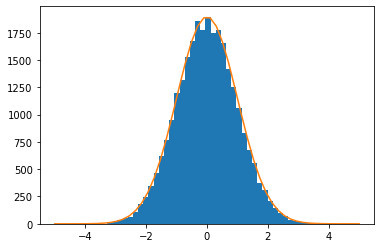

In [5]:
n, _, _ = plt.hist(positions,bins=50)
x = np.linspace(-5, 5)
# compare with ground state wavefunction (not normalized)
plt.plot(x, np.exp(-x**2/2) * n.max())

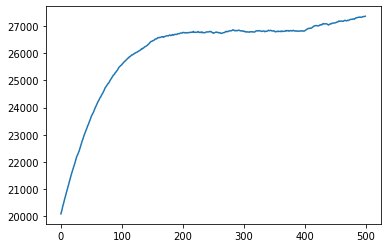

In [6]:
plt.plot(n_cfg)

## Find $E_0$

In [7]:
# initial configuration size
M = 20000
# initialization of $M$ psitions as configurations
positions = np.random.rand(M) - 0.5

# initial guess of $E_0$ 
e0 = 0.4
# rate for updating e0
a = 0.5

# number of configurations during iteration
n_cfg = [M, M]
for i in range(2000):
    e0 -= a * (n_cfg[-1] - n_cfg[-2]) / n_cfg[-1]
    if i % 100 == 0:
        print(i, n_cfg[-1], e0)
    # Eq. 7b
    positions2 = positions + np.random.normal(0, np.sqrt(2 * D * dt), size=len(positions))
    # Eq. 7a
    omega = np.exp(-dt / 2 * (1/2 * positions ** 2 + 1/2 * positions2 ** 2) + dt * e0)
    # determine branching or deletion
    xi_list = np.array(omega + np.random.rand(len(omega)), dtype=np.int)
    idx_list = []
    for i, xi in enumerate(xi_list):
        idx_list.extend([i] * xi)
    positions = positions2[idx_list]
    n_cfg.append(len(positions))

0 20000 0.4
100 22256 0.34662220024923823
200 20503 0.38766383109613173
300 18875 0.42905508367081574
400 17769 0.45926275971413133
500 17164 0.4765923363919183
600 16925 0.48360998237945535
700 16609 0.4930440177966636
800 16346 0.5010324430099306
900 16227 0.5046928979671077
1000 16240 0.5043006096683307
1100 16243 0.5042142317350363
1200 16250 0.5040055408745231
1300 16207 0.5053375959905144
1400 16267 0.5034972904504856
1500 16403 0.4993402131020904
1600 16261 0.5036971356211153
1700 16297 0.5025974318062648
1800 16318 0.5019618170797582
1900 16218 0.5050423155647618
